In [ ]:
%%capture
%pip install nltk
%pip install scipy
%pip install wordcloud
%pip install 


In [2]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
import warnings
from scipy.stats import pearsonr 
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

In [3]:
ls

 Volume in drive D is DATA
 Volume Serial Number is FC9C-ABB3

 Directory of d:\Akshat\projects_24'\EchoSense

06-03-2025  04:26 PM    <DIR>          .
06-03-2025  04:05 PM    <DIR>          ..
06-03-2025  04:03 PM    <DIR>          .vscode
06-03-2025  04:00 PM    <DIR>          __MACOSX
07-03-2025  03:25 PM            37,238 EchoSpace.ipynb
06-03-2025  04:00 PM         1,364,266 Ted_Talks_Recommendation_System_with_Machine_Learning.ipynb
06-03-2025  03:59 PM           975,514 Ted_Talks_Recommendation_System_with_Machine_Learning-ipynb (1).zip
06-03-2025  04:26 PM         2,411,249 tedx_dataset.csv
               4 File(s)      4,788,267 bytes
               4 Dir(s)  429,489,713,152 bytes free


In [4]:
df = pd.read_csv('tedx_dataset.csv')
print(df.head())
df.shape


                                idx       main_speaker  \
0  8d2005ec35280deb6a438dc87b225f89     Alexandra Auer   
1  b3072cd11f40eb57fd259555264476c6  Elizabeth Gilbert   
2  4adc9fee977fa04c357ed4c9b52aa3cc       Butterscotch   
3  59c641a72b495d522a7932145d6c02b3         Ethan Lisi   
4  d227f2faf6ec185e54436d86463f499b      Daniel Finkel   

                                               title  \
0                    The intangible effects of walls   
1  It's OK to feel overwhelmed. Here's what to do...   
2                                  "Accept Who I Am"   
3               What it's really like to have autism   
4              Can you solve the sea monster riddle?   

                                             details           posted  \
0  More barriers exist now than at the end of Wor...  Posted Apr 2020   
1  If you're feeling anxious or fearful during th...  Posted Apr 2020   
2  Firing off her formidable beatboxing skills, m...  Posted Apr 2020   
3  "Autism is not a di

(4467, 7)

In [5]:
print(df.columns)
df.isnull().sum()

Index(['idx', 'main_speaker', 'title', 'details', 'posted', 'url',
       'num_views'],
      dtype='object')


idx                0
main_speaker       1
title              0
details            0
posted             0
url                0
num_views       4258
dtype: int64

In [6]:
#drop num_views as mosst data missing
df = df.drop('num_views', axis=1)


In [7]:
splitted = df['posted'].str.split(' ', expand=True)

#create col for month and year for the talks
df['year'] = splitted[2].astype('int')
df['month'] = splitted[1]


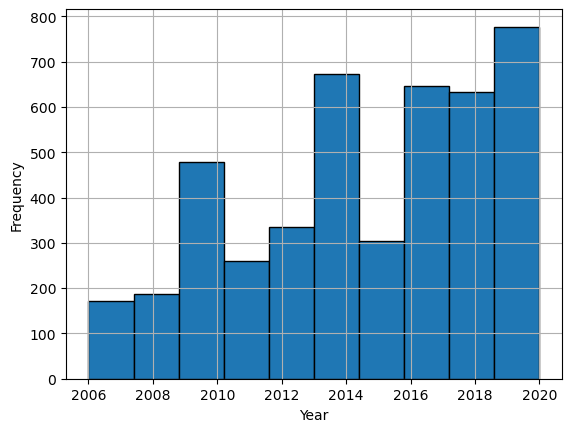

In [8]:
df['year'].hist(bins=10, edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()




In [9]:
print(df.columns)


Index(['idx', 'main_speaker', 'title', 'details', 'posted', 'url', 'year',
       'month'],
      dtype='object')


In [10]:
# Let's combine the title and the details of the talk.
df['details'] = df['title'] + ' ' + df['details']

# Removing the unnecessary information
df = df[['main_speaker', 'details']]
df.dropna(inplace = True)
df.head()


,main_speaker,details
0,Alexandra Auer,The intangible effects of walls More barriers ...
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" Firing off her formidable be..."
3,Ethan Lisi,"What it's really like to have autism ""Autism i..."
4,Daniel Finkel,Can you solve the sea monster riddle? Accordin...


In [11]:
df.copy()

,main_speaker,details
0,Alexandra Auer,The intangible effects of walls More barriers ...
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" Firing off her formidable be..."
3,Ethan Lisi,"What it's really like to have autism ""Autism i..."
4,Daniel Finkel,Can you solve the sea monster riddle? Accordin...
...,...,...
4462,Hans Rosling,The best stats you've ever seen You've never s...
4463,Sir Ken Robinson,Do schools kill creativity? Sir Ken Robinson m...
4464,Majora Carter,Greening the ghetto In an emotionally charged ...
4465,David Pogue,Simplicity sells New York Times columnist Davi...


In [13]:
nltk.download('stopwords')

True

In [14]:
#text_processging
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    for word in str(text).split():
        word = word.lower()

        if word not in stop_words:
            imp_words.append(word)
    
    output = " ".join(imp_words)

    return output
    

In [16]:
def clean_text(text):
    return remove_stopwords(text)

df['details'] = df['details'].apply(clean_text)

df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed. here's next feeling anxio...
2,Butterscotch,"""accept am"" firing formidable beatboxing skill..."
3,Ethan Lisi,"really like autism ""autism disease; another wa..."
4,Daniel Finkel,"solve sea monster riddle? according legend, ev..."


In [19]:
#removing all the punctuations
import re

def cleaning_punctuations(text):
    return re.sub(r'[^\w\s]', '', text)  

df['details'] = df['details'].apply(cleaning_punctuations)

df.head()


,main_speaker,details
0,Alexandra Auer,intangible effects walls barriers exist end wo...
1,Elizabeth Gilbert,ok feel overwhelmed heres next feeling anxious...
2,Butterscotch,accept am firing formidable beatboxing skills ...
3,Ethan Lisi,really like autism autism disease another way ...
4,Daniel Finkel,solve sea monster riddle according legend ever...


In [26]:
%%capture
#building our recommender system
#using TF-IDF vectorixer to convert text-->num

%%capture
vectorizer = TfidfVectorizer(analyzer='word')
vectorizer.fit(df['details"'])


In [ ]:
#here I am using cosine similarity and pearson correlation

def get_similarities(talk_content, data=df):

    